## 세번째 과제 : IQR 기반과 Z-Score 기반 이상치 탐지

## 데이터 : Air Quality 데이터셋에서 변수 PT08.S3(NOX)

In [2]:
# Sample Dataset : Air Quality
# 실습 데이터 : Air Quality Dataset(link)
"""
1. 이탈리아 도시에 설치된 다중 에어 센서 데이터
2. 공기 질 관련 15개의 변수로 구성(시간별 평균)
"""

import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

C:\Users\stat1721\AppData\Local\Temp\ipykernel_19152\258828302.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [6]:
"""
Load AirQualityUCI Data
"""
print("parser")
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = 'C:/Users/stat1721/Desktop/2022년/데이터엔지니어링/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)
df.head()

parser


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


<AxesSubplot:xlabel='Datetime'>

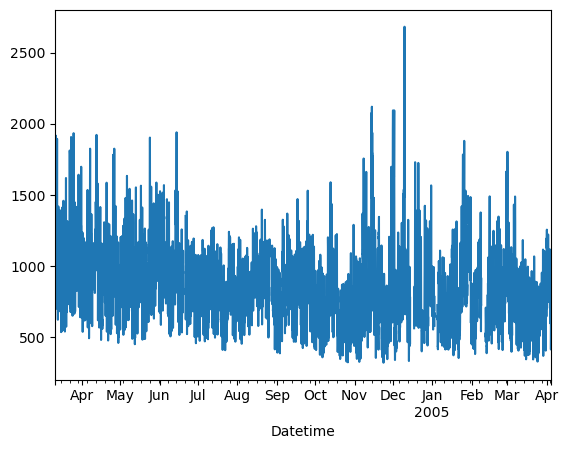

In [11]:
# PT08.S3(NOx)
df["PT08.S3(NOx)"].plot()

In [19]:
# Missing Data Reconstruction: Linear Interpolation
# 결측 데이터 처리: 선형보간
pt=df['PT08.S3(NOx)'].interpolate().copy()
pt

Datetime
2004-03-10 18:00:00    1056.0
2004-03-10 19:00:00    1174.0
2004-03-10 20:00:00    1140.0
2004-03-10 21:00:00    1092.0
2004-03-10 22:00:00    1205.0
                        ...  
2005-04-04 10:00:00     539.0
2005-04-04 11:00:00     604.0
2005-04-04 12:00:00     603.0
2005-04-04 13:00:00     702.0
2005-04-04 14:00:00     654.0
Name: PT08.S3(NOx), Length: 9357, dtype: float64

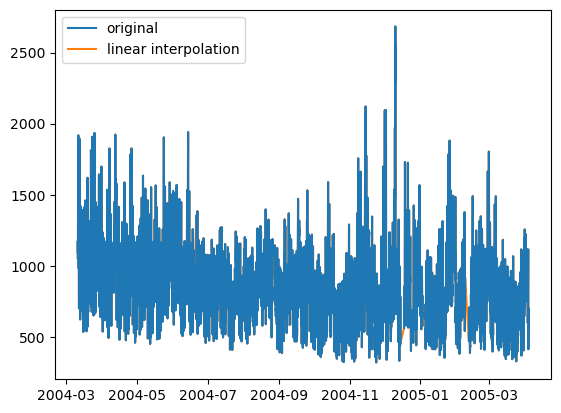

In [15]:
# Visualize original and imputed data
plt.plot(df['PT08.S3(NOx)'], label='original', zorder=2)
plt.plot(pt, label='linear interpolation', zorder=1)
plt.legend(loc='best')

Text(0.5, 0, 'PT08.S3(NOx)')

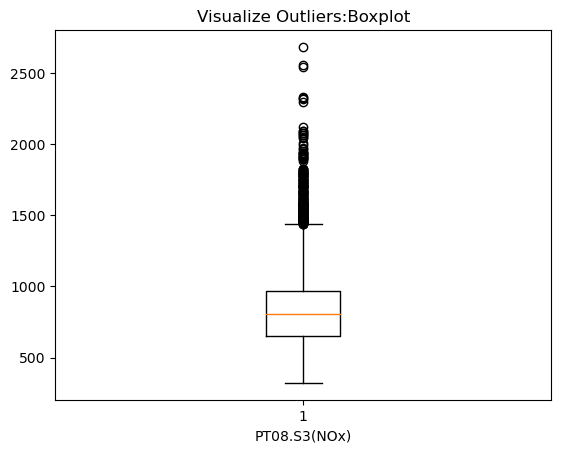

In [17]:
# Visualize Outliers:Boxplot
# 이상치 시각화 : 박스플롯
plt.boxplot(pt)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('PT08.S3(NOx)')

In [18]:
# Visualize Outliers: Scatter Plot
# 이상치 시각화
corr_matrix = df.corr()
corr_matrix

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
CO(GT),1.000000,0.877203,0.914973,0.792557,-0.701703,0.679262,0.639470,0.851403,0.040218,0.065809,0.845144
PT08.S1(CO),0.877203,1.000000,0.892964,0.713654,-0.771938,0.641529,0.682881,0.899324,0.114606,0.135324,0.883795
PT08.S2(NMHC),0.914973,0.892964,1.000000,0.704435,-0.796703,0.646245,0.777254,0.880578,-0.090380,0.186933,0.981950
NOx(GT),0.792557,0.713654,0.704435,1.000000,-0.655707,0.763111,0.233731,0.787046,0.221032,-0.149323,0.626638
PT08.S3(NOx),-0.701703,-0.771938,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.796569,-0.056740,-0.232017,-0.735744
NO2(GT),0.679262,0.641529,0.646245,0.763111,-0.652083,1.000000,0.157360,0.708128,-0.091759,-0.335022,0.544039
PT08.S4(NO2),0.639470,0.682881,0.777254,0.233731,-0.538468,0.157360,1.000000,0.591144,-0.032188,0.629641,0.765731
PT08.S5(O3),0.851403,0.899324,0.880578,0.787046,-0.796569,0.708128,0.591144,1.000000,0.124956,0.070751,0.865689
RH,0.040218,0.114606,-0.090380,0.221032,-0.056740,-0.091759,-0.032188,0.124956,1.000000,0.167971,-0.061681
AH,0.065809,0.135324,0.186933,-0.149323,-0.232017,-0.335022,0.629641,0.070751,0.167971,1.000000,0.167972


In [23]:
# Choose the least correlated variable
rh = df['RH'].copy().interpolate() # Relative Humidity
rh

Datetime
2004-03-10 18:00:00    48.9
2004-03-10 19:00:00    47.7
2004-03-10 20:00:00    54.0
2004-03-10 21:00:00    60.0
2004-03-10 22:00:00    59.6
                       ... 
2005-04-04 10:00:00    29.3
2005-04-04 11:00:00    23.7
2005-04-04 12:00:00    18.3
2005-04-04 13:00:00    13.5
2005-04-04 14:00:00    13.1
Name: RH, Length: 9357, dtype: float64

In [22]:
# Choose the most correlated variable
nmhc = df['PT08.S2(NMHC)'].copy().interpolate() # NMHC: Non-metanic Hydrocarbon
nmhc

Datetime
2004-03-10 18:00:00    1046.0
2004-03-10 19:00:00     955.0
2004-03-10 20:00:00     939.0
2004-03-10 21:00:00     948.0
2004-03-10 22:00:00     836.0
                        ...  
2005-04-04 10:00:00    1101.0
2005-04-04 11:00:00    1027.0
2005-04-04 12:00:00    1063.0
2005-04-04 13:00:00     961.0
2005-04-04 14:00:00    1047.0
Name: PT08.S2(NMHC), Length: 9357, dtype: float64

Text(0.5, 1.0, 'Detecting outliers using Boxplot')

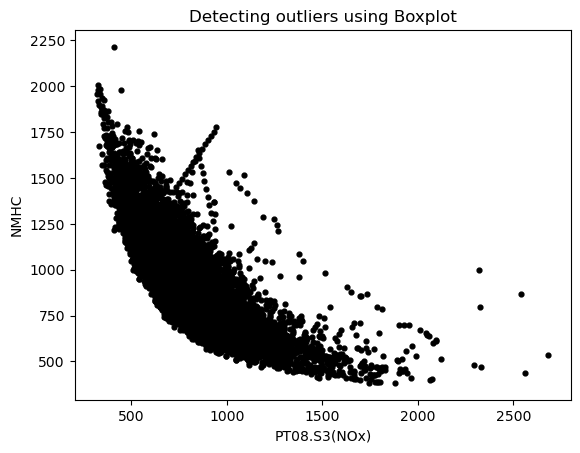

In [25]:
# Visualize a scatter plot(PT08.S3, NMHC)
plt.scatter(pt, nmhc, s=12, c='black')
plt.xlabel('PT08.S3(NOx)')
plt.ylabel('NMHC')
plt.title("Detecting outliers using Boxplot")

Text(0.5, 1.0, 'Detecting outliers using Boxplot')

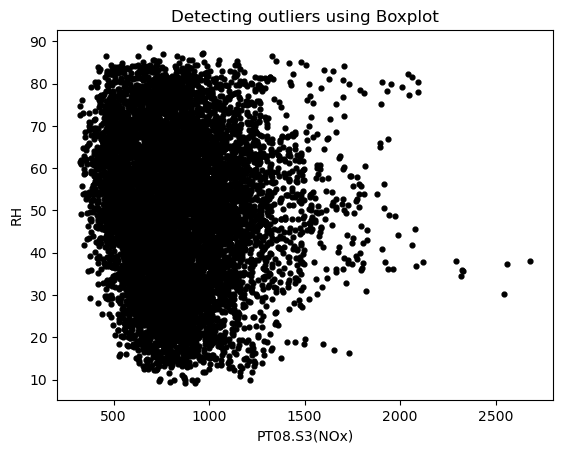

In [27]:
# Visualize a scatter plot(PT08.S3, RH)
plt.scatter(pt, rh, s=12, c='black')
plt.xlabel('PT08.S3(NOx)')
plt.ylabel('RH')
plt.title("Detecting outliers using Boxplot")

In [31]:
"""
IQR-based Outlier Detection
"""
# Q1, Q2(median), Q3
q1 = pt.quantile(0.25) # upper 25%
median = pt.quantile(0.5) # upper 50% 
q3 = pt.quantile(0.75) # upper 75%
print("Q1 =", q1)
print("Median =", median)
print("Q3 =", q3)

Q1 = 654.0
Median = 804.0
Q3 = 968.0


In [35]:
# IQR, upper_fence, lower_fence
iqr = q3 - q1
upper_fence = q3 + 1.5 * iqr
lower_fence = q1 - 1.5 * iqr
print("upper_fence =", upper_fence)
print("lower_fence =", lower_fence)

upper_fence = 1439.0
lower_fence = 183.0


In [36]:
# 이상치 탐지
outliers = pt.loc[(pt > upper_fence) | (pt < 0)]
outliers

Datetime
2004-03-11 00:00:00    1462.0
2004-03-11 01:00:00    1453.0
2004-03-11 02:00:00    1579.0
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
                        ...  
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
2005-03-07 04:00:00    1490.0
Name: PT08.S3(NOx), Length: 239, dtype: float64

In [38]:
# Mask for outliers
mask = pt.index.isin(outliers.index)
mask[:50]

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

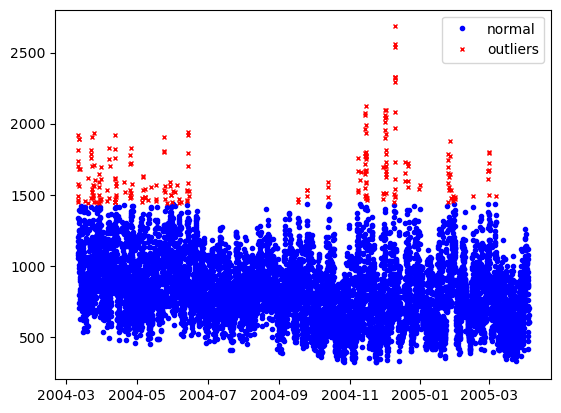

In [39]:
# Visualize the normal data and outliers ~: not
# 정상 데이터와 이상치
plt.plot(pt[~mask], label='normal', color='blue',
    marker='o', markersize=3, linestyle='None')
plt.plot(outliers, label='outliers', color='red',
    marker='x', markersize=3, linestyle='None')
plt.legend(loc='best')

In [43]:
# 후처리: 이상치 제거 후 보간
pt_refined = pt.copy()
pt_refined[mask] = np.NaN
print(pt_refined)

Datetime
2004-03-10 18:00:00    1056.0
2004-03-10 19:00:00    1174.0
2004-03-10 20:00:00    1140.0
2004-03-10 21:00:00    1092.0
2004-03-10 22:00:00    1205.0
                        ...  
2005-04-04 10:00:00     539.0
2005-04-04 11:00:00     604.0
2005-04-04 12:00:00     603.0
2005-04-04 13:00:00     702.0
2005-04-04 14:00:00     654.0
Name: PT08.S3(NOx), Length: 9357, dtype: float64


<AxesSubplot:xlabel='Datetime'>

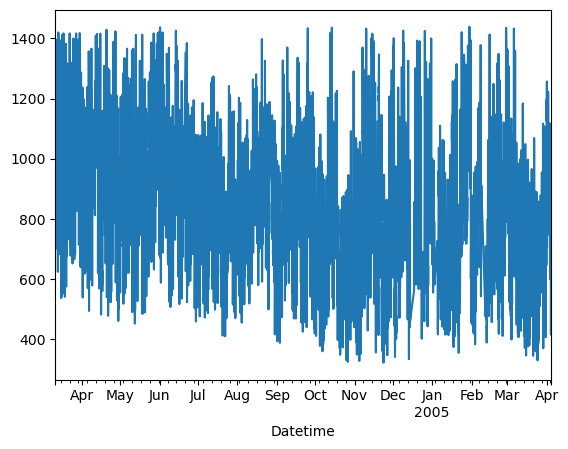

In [44]:
pt_refined.interpolate(inplace=True)
pt_refined.plot()

C:\Users\stat1721\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PT08.S3(NOx)', ylabel='Density'>

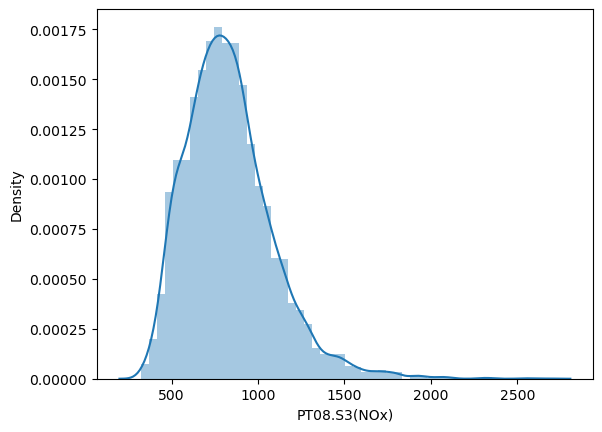

In [48]:
"""
Detecting Outliers with Z-Scores
"""
# Z-Score
"""
1. 1차원 또는 낮은 차웡늬 데이터를 적합한 모수적 방법
2. 데이터가 정규 분포를 가지는 것으로 가정
3. 임계치 Z값을 벗어날 때 이상치로 간주
"""

import seaborn as sns
sns.distplot(pt)

In [50]:
# Mean, Standard deviation
mean = np.mean(pt)
std = np.std(pt)
print("mean =", mean)
print("std =", std)

mean = 832.7588970823982
std = 255.69616900657363


In [51]:
outliers = []
thres = 3 
for i in pt:
    z_score = (i-mean) / std
    if (np.abs(z_score) > thres):
        print(z_score)
        outliers.append(i)

3.4112404042126165
3.8531711552247483
4.244260315412475
3.5402998270745667
3.3134681141656848
4.146488025365544
4.154309808569298
3.3330225721750715
3.0788146180530487
3.833616697215362
3.6106958759083576
3.7280226239646757
3.395596837805108
4.205151399393703
3.419062187416371
4.310745472644389
3.0162403524230124
3.168765124896226
3.051438376839908
3.387775054601353
3.5833196346952167
3.8844582880397667
3.4112404042126165
3.0592601600436624
3.8688147216322575
4.2638147734218625
3.6106958759083576
3.051438376839908
3.716289949159044
3.462081995037021
3.4777255614445304
3.8844582880397667
3.137477992081208
3.098369076062435
3.8101513476040982
4.189507832986194
3.794507781196589
3.763220648381571
4.334210822255653
4.240349423810598
3.4034186210088624
3.6146067675102347
3.254804740137526
3.0045076776173807
3.2469829569337714
3.168765124896226
3.6693592499365164
4.8660920801109615
4.807428706082803
4.424161329098831
3.7553988651778165
3.2508938485356484
3.4542602118332666
5.038171310593562


In [52]:
# Simplified version of filtering outliers
outliers = pt.loc[np.abs((pt-mean) / std) > 3]
outliers

Datetime
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
2004-03-11 05:00:00    1918.0
2004-03-11 06:00:00    1738.0
2004-03-12 03:00:00    1680.0
                        ...  
2005-02-28 06:00:00    1665.0
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
Name: PT08.S3(NOx), Length: 111, dtype: float64

In [53]:
# Mask for outliers
mask = pt.index.isin(outliers.index)
mask[:50]

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

C:\Users\stat1721\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\stat1721\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


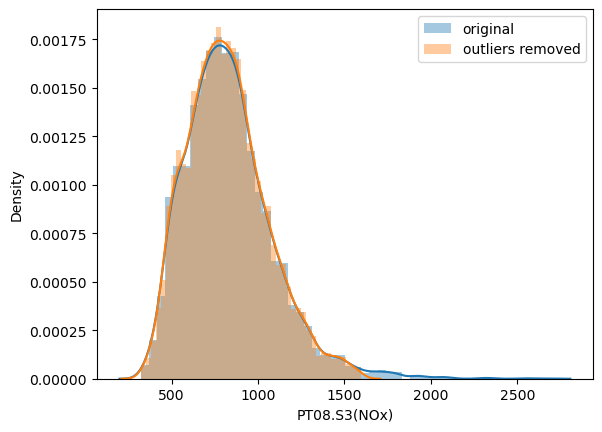

In [56]:
# Comparison of distributions before/after outlier removal
# 이상치 제거 후 분포 비교
sns.distplot(pt, axlabel='PT08.S3(NOx)', label='original')
sns.distplot(pt[~mask], label='outliers removed')
plt.legend(loc='best')